<a href="https://colab.research.google.com/github/RoccoBellusci/MLPNS_RBellusci/blob/main/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [3]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["image.interpolation"] = "nearest" # per evitare che non interpoli i pixel
plt.rcParams["image.cmap"] = "gist_gray"

In [4]:
cd /content/drive/MyDrive/MLPNS2023

/content/drive/MyDrive/MLPNS2023


In [5]:
ls

kaggleHiggs/  kaggle.json  kaggleTitanic/  MLPNS2023/


In [6]:
cd /content/drive/MyDrive/MLPNS2023/MLPNS2023

/content/drive/MyDrive/MLPNS2023/MLPNS2023


In [7]:
ls

kaggleTitanic/  spm-20210427T111354Z-001.zip


In [8]:
ls

kaggleTitanic/  spm-20210427T111354Z-001.zip


In [9]:
ls

kaggleTitanic/  spm-20210427T111354Z-001.zip


In [10]:
ls

kaggleTitanic/  spm-20210427T111354Z-001.zip


In [11]:
!unzip spm-20210427T111354Z-001.zip

Archive:  spm-20210427T111354Z-001.zip
  inflating: spm/spm_struct_pos.npy  
  inflating: spm/spm_struct_neg.npy  
  inflating: spm/test_good_all.npy   
  inflating: spm/train_good_all.npy  
  inflating: spm/test_bad_all.npy    
  inflating: spm/train_bad_all.npy   


In [12]:
data = np.load("spm/train_good_all.npy")

In [13]:
data.shape

(1302, 64, 64)

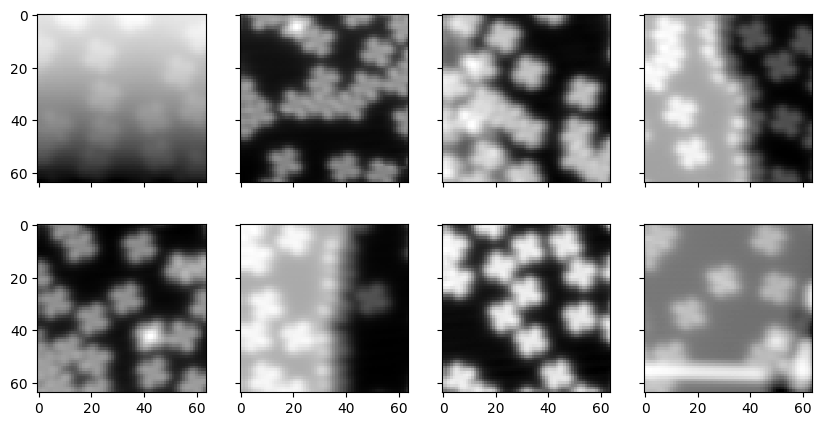

In [14]:
fig, ax = plt.subplots(2, 4, sharex = True, sharey = True, figsize = (10,5))

for ii in range(8):
  ax[ii // 4, ii % 4].imshow(data[ii])

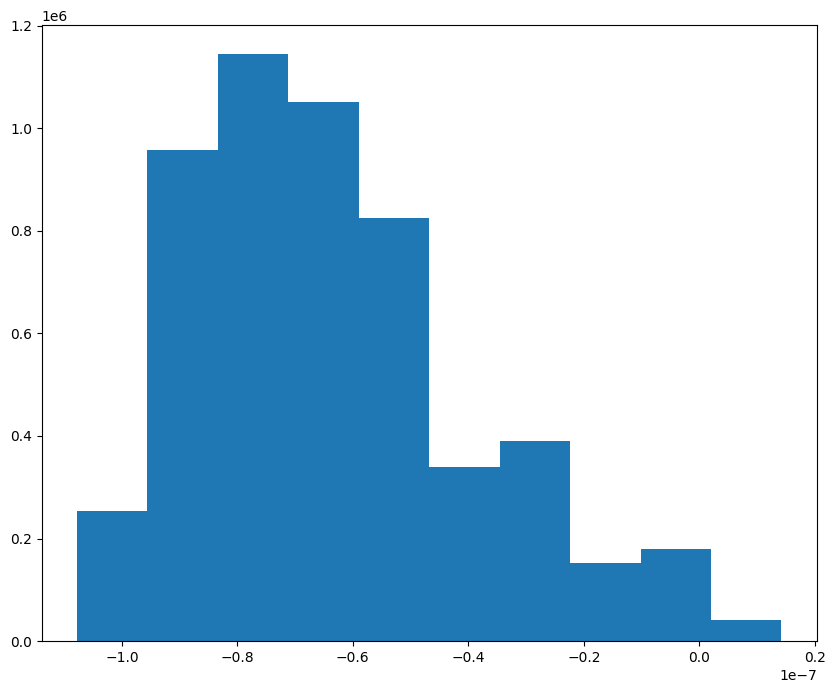

In [17]:
plt.hist(data.flatten());

In [20]:
#norm = ( D - MIN(D)) / RANGE(D)
norm = (data - data.min(axis=(1, 2), keepdims=True)) / (data.max(axis=(1, 2), keepdims=True) - 
                                                        data.min(axis=(1, 2), keepdims=True))

In [21]:
norm.shape

(1302, 64, 64)

In [22]:
norm.min(), norm.max()

(0.0, 1.0)

In [25]:
pos = np.load("spm/spm_struct_pos.npy")
neg = np.load("spm/spm_struct_neg.npy")
 


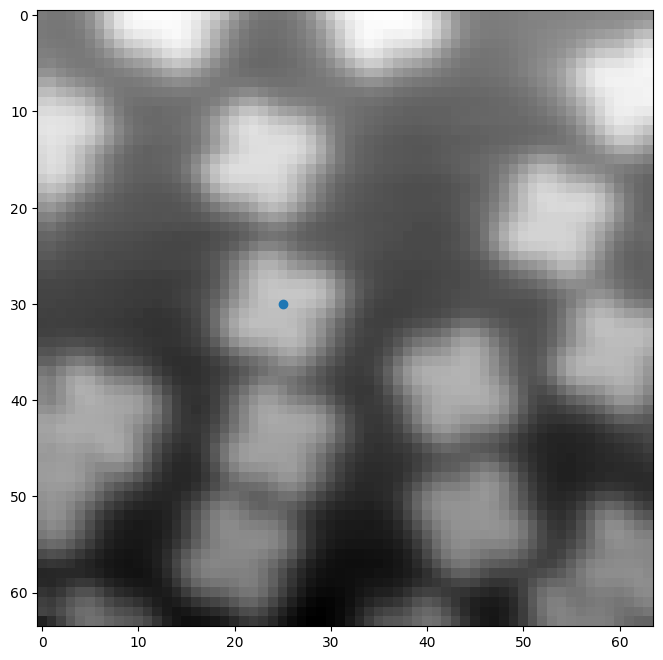

In [27]:
plt.imshow(norm[pos[0][2]])
plt.plot(pos[0][1], pos[0][0],'o')

In [50]:
wid = 10
stmp_pos = []

for ii in range(pos.shape[0]):
  trow, tcol, tind = pos[ii]
  if (trow > wid) & (trow < 64 - wid) & (tcol < 64 - wid) & (tcol > wid):
    stmp_pos.append(norm[tind, trow-wid:trow+wid,  tcol-wid:tcol+wid])

stmp_pos = np.array(stmp_pos)

In [38]:
stmp_pos.shape

AttributeError: ignored

In [39]:
pos.shape[0]

500

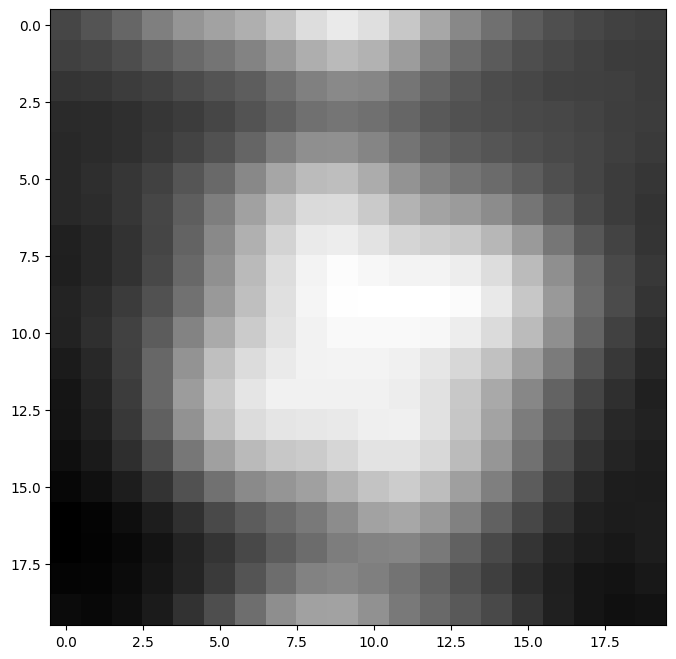

In [44]:
plt.imshow(stmp_pos[0])

In [49]:
wid = 10
stmp_neg = []

for ii in range(pos.shape[0]):
  trow, tcol, tind = neg[ii]
  if (trow > wid) & (trow < 64 - wid) & (tcol < 64 - wid) & (tcol > wid):
    stmp_neg.append(norm[tind, trow-wid:trow+wid,  tcol-wid:tcol+wid])

stmp_neg = np.array(stmp_neg)

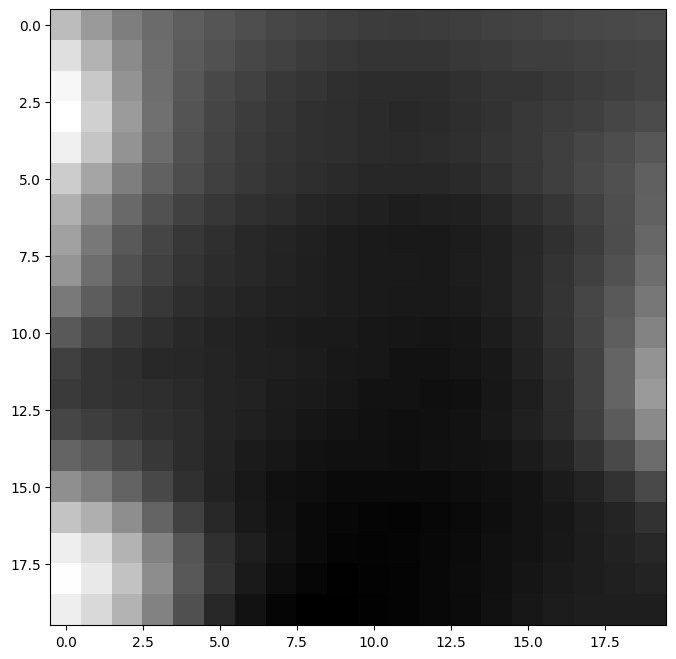

In [45]:
plt.imshow(stmp_neg[0])

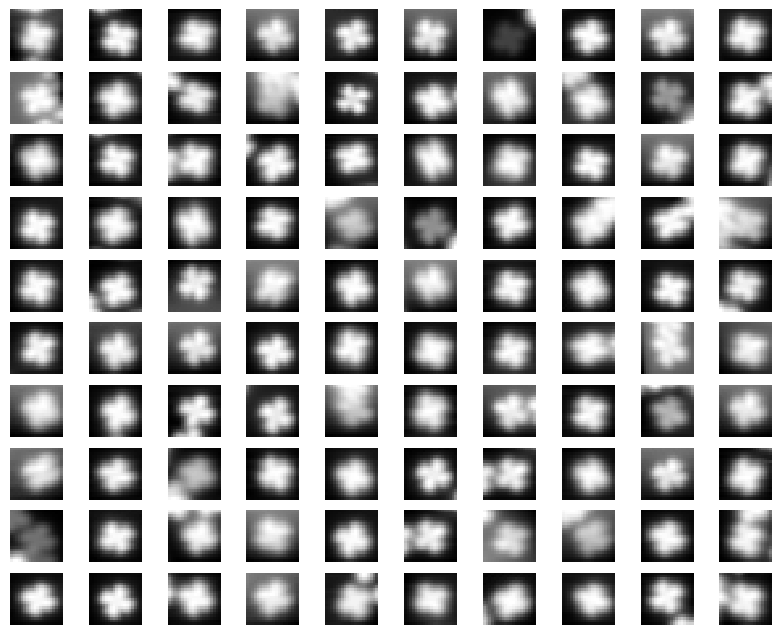

In [46]:
# plot  positive examples
fig, ax = plt.subplots(10, 10)
for ii in range(100):
    ax[ii // 10, ii % 10].imshow(stmp_pos[ii])
    ax[ii // 10, ii % 10].axis("off")

In [51]:
feat = np.concatenate((stmp_neg, stmp_pos), axis = 0)
targ = np.concatenate((np.zeros(stmp_neg.shape[0]), np.ones(stmp_pos.shape[0])))

In [52]:
targ

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [57]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat,targ, random_state = 302, shuffle = True)

feat_tr.shape

(655, 20, 20)

In [58]:
feat_tr = np.expand_dims(feat_tr, axis = 3)
feat_te = np.expand_dims(feat_te, axis = 3)
feat_tr.shape

(655, 20, 20, 1)

# Create a NN



*   conv2d 16 neurons
*   maxpool2d
*   conv2d 32 neuron
* maxpoll2d
* flatten 
*dense 64 neurons
* dense 2 neurons (why??)



In [72]:
layer1 = keras.layers.Conv2D(16, kernel_size=(5, 5), padding="same", 
                             activation="relu", 
                             input_shape=(2 * wid, 2 * wid, 1), #needed in the first layer only
                             kernel_regularizer=keras.regularizers.l2(0.001))

layer2 = keras.layers.MaxPooling2D(pool_size = (2,2)) #padding="same", 
                             #activation="relu", 
                             #kernel_regularizer=keras.regularizers.l2(0.001))

layer3 = keras.layers.Conv2D(32, kernel_size=(5, 5), padding="same", 
                             activation="relu", 
                             input_shape=(2 * wid, 2 * wid, 1), #needed in the first layer only
                             kernel_regularizer=keras.regularizers.l2(0.001))

layer4 = keras.layers.MaxPooling2D(pool_size = (2,2)) 

layer5 = keras.layers.Flatten()

layer6 = keras.layers.Dense(64, activation = "relu")

layer7 = keras.layers.Dense(2, activation = "softmax")

layers = [layer1, layer2, layer3, layer4, layer5, layer6, layer7]
model = keras.Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 20, 20, 16)        416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 32)        12832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [73]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = "accuracy")

In [74]:
history = model.fit(feat_tr, targ_tr, epochs = 50, batch_size = 50, validation_split = 0.1)

Epoch 1/50
12/12 [==============================] - 2s 24ms/step - loss: 0.6071 - accuracy: 0.7946 - val_loss: 0.4908 - val_accuracy: 0.8182
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.4201 - accuracy: 0.8964 - val_loss: 0.2838 - val_accuracy: 0.9545
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.3243 - accuracy: 0.8998 - val_loss: 0.2606 - val_accuracy: 0.8939
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 0.2461 - accuracy: 0.9253 - val_loss: 0.2381 - val_accuracy: 0.8939
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2128 - accuracy: 0.9304 - val_loss: 0.2154 - val_accuracy: 0.9091
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1860 - accuracy: 0.9406 - val_loss: 0.2060 - val_accuracy: 0.9394
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 0.1543 - accuracy: 0.9525 - val_loss: 0.1862 - val_accuracy: 0.9242
Epoch 8/50
12/12 [=

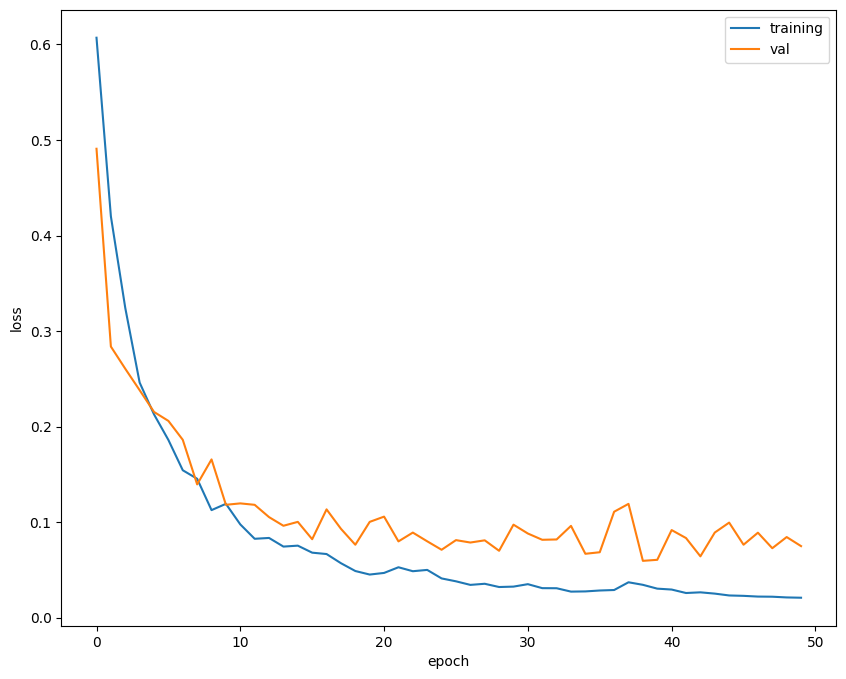

In [75]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [76]:
history.history["val_accuracy"]

[0.8181818127632141,
 0.9545454382896423,
 0.8939393758773804,
 0.8939393758773804,
 0.9090909361839294,
 0.939393937587738,
 0.9242424368858337,
 0.9696969985961914,
 0.939393937587738,
 0.9545454382896423,
 0.9696969985961914,
 0.9545454382896423,
 0.9696969985961914,
 0.9696969985961914,
 0.9545454382896423,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9848484992980957,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9848484992980957,
 0.9848484992980957,
 0.9696969985961914,
 0.9696969985961914,
 0.9848484992980957,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.969696998596